<a href="https://colab.research.google.com/github/anamunoz01/AA_PRACTICA1_GRUPO_10/blob/main/Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GRUPO 10 

Elena Gómez

Ana Muñoz

OBJETIVO

Crear un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y clasificar imágenes de ropa en sus diferentes tipologías. Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones. 

En primer lugar tenemos que crear un modelo en Keras aplicando el conjunto de datos Fashion-MNIST.

Fashion-MNISTes un conjunto de datos de las imágenes de los artículos de Zalando, una tienda de moda online alemana especializada en ventas de ropa y zapatos. 

El conjunto de datos contiene 70K imágenes en escala de grises en 10 categorías. Estas imágenes muestran prendas individuales de ropa en baja resolución (28 x 28 píxeles).

Se usan 60K imágenes para entrenar lared y 10K imágenes para evaluarla precisióncon la que la red aprende a clasificar las imágenes

Importamos tensorflow y comprobamos que la versión es 2.0.0 o superior 

In [195]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

2.6.0
GPU Available: []
2.6.0


A continuación, cargamos las imágenes y creamos un vector de 10 elementos en el que cada posición se asigna el nombre de cada prenda. ('class_names')

In [196]:
# Importamos las imágenes
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#creamos vector con elementos
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



Estudiamos los **datos de entrenamiento**


In [ ]:
print(train_images.shape)


#vemos la matriz de la imagen 50000
train_images[5000]


In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
#Sacamos la etiqueta de la imagen 50000
train_labels[5000]

4

Imprimimos la imagen por pantalla utilizando matplotlib, y nos damos cuenta que corresponde con el elemento 4 de nuestro vector, es decir, un abrigo.

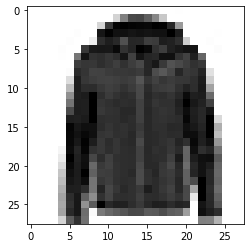

In [197]:
import matplotlib.pyplot as plt
digit = train_images[5000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Estudiamos los **datos de prueba**

In [ ]:
print(test_images.shape)

(10000, 28, 28)


In [ ]:
test_images[8000]

In [ ]:
test_labels[8000]

7

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

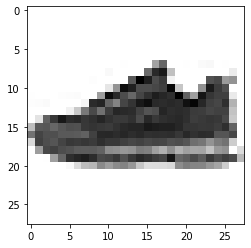

In [ ]:
import matplotlib.pyplot as plt
digit = test_images[8000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

**CREAMOS LAS RNA**

Vamos a crear 8 modelos diferentes, para todos la red sera secuencial y tendrá dos capas tipo Dense (densamente conectadas). Cambiaremos el optimizador, la función de activación y el número de neuronas de la primera capa.

Cada una de las neuronas de la capa de entrada están conectadas con los 784 píxeles = 28*28. Solo lo 
definimos para la primera capa. Para la segunda capa y posteriores, Keras lo 
deduce.

Para todos los modelos, la segunda capa tendrá la función de activación "softmax" de 10 vías (o neuronas). 
Significa que devolverá una matriz de 10 puntuaciones de probabilidad. La puntuación será la probabilidad de que la imagen del dígito actual pertenezca a una de nuestras clases de 10 dígitos.

Para los cuatro primeros modelos, la primera capa tendrá 10 neuronas.

In [198]:

from keras import models
from keras import layers


**MODELO 1**

In [199]:
#función de activación: relu
#optimizador: sgd
network1 = models.Sequential()
network1.add(layers.Dense(10, activation='relu', input_shape=(28*28,), name = 'capa1'))
network1.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network1.summary()
# 7850 = 784 x 10 + 10 Sesgo
# 110 = 10x10 + 10 Sesgo
# 7960 = 7850 + 110


Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 10)                7850      
_________________________________________________________________
capa2 (Dense)                (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


**MODELO 2**

In [200]:
#función de activación: relu
#optimizador: rmsprop
network2 = models.Sequential()
network2.add(layers.Dense(10, activation='relu', input_shape=(28*28,), name = 'capa1'))
network2.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network2.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 10)                7850      
_________________________________________________________________
capa2 (Dense)                (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


**MODELO 3**

In [201]:
##función de activación: sigmoid
#optimizador: sgd
network3 = models.Sequential()
network3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,), name = 'capa1'))
network3.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network3.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 10)                7850      
_________________________________________________________________
capa2 (Dense)                (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


**MODELO 4**

In [202]:
#función de activación: sigmoid
#optimizador: rmsprop
network4 = models.Sequential()
network4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,), name = 'capa1'))
network4.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network4.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 10)                7850      
_________________________________________________________________
capa2 (Dense)                (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


**COMPILACIÓN**

Para el algoritmo optimizador utilizamos tanto rmsprop (Root Mean Square Propagation), como sgd (Stocastic Gradient Descendent), dependiendo del modelo.

Para la función de pérdida utilizamos sparse_categorical_crossentropy

Para la métrica utilizamos accuracy

In [203]:
network1.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [204]:
network2.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [205]:
network3.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [206]:
network4.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

TRANSFORMACIÓN DATOS

Antes del entrenamiento, preprocesaremos nuestros datos dándoles la forma que espera la red y escalando para que todos los valores estén en el intervalo [0, 1].Pasando de una matriz de forma (60000, 28, 28) con valores en el intervalo [0, 255] a una matriz de forma float32 con forma (60000, 28 * 28) con valores entre 0 y 1

In [207]:
# PREPARAMOS LOS DATOS DE IMAGEN CON ALGUNA TRANSFORMACIÓN. NORMALIZACION
# Los tensores transformados tienen la misma cantidad de datos total que el 
# tensor inicial
train_images = train_images.reshape((60000, 28 * 28))
train_images, len(train_images), train_images.shape, #train_images[50000]

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 60000, (60000, 784))

In [ ]:
train_images = train_images.astype('float32') / 255
train_images, len(train_images), train_images.shape, train_images[50000]

In [209]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [210]:
# 6.- PREPARACIÓN LAS ETIQUETAS
# from keras import utils
# from keras.utils import to_categorical
network1.add(layers.Flatten(input_shape=(28,28)))
network2.add(layers.Flatten(input_shape=(28,28)))
network3.add(layers.Flatten(input_shape=(28,28)))
network4.add(layers.Flatten(input_shape=(28,28)))
train_labels[5000] # Posición 0 a 9 donde solo la 9 tiene probabilidad 1 (boot).

4

Como hemos visto antes la imagen 5000 correspondía con la posición 4 de nuestro vector, de esta manera erificamos que le imagen 5000 se corresponde con dicha posición, ya que aparece el 1 en esa posicion 

Entrenamos las redes de neuronas

In [211]:
network1.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3751 - accuracy: 0.5490
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.7965 - accuracy: 0.7336
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6807 - accuracy: 0.7696
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6234 - accuracy: 0.7876
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5878 - accuracy: 0.8006


In [212]:
network2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.8889 - accuracy: 0.6967
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5346 - accuracy: 0.8147
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4888 - accuracy: 0.8312
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4627 - accuracy: 0.8395
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4470 - accuracy: 0.8468


In [213]:
network3.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 2.1031 - accuracy: 0.3158
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 1.8203 - accuracy: 0.4944
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 1.6136 - accuracy: 0.5899
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 1.4504 - accuracy: 0.6341
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3217 - accuracy: 0.6666


In [214]:
network4.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 1.4850 - accuracy: 0.6017
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8882 - accuracy: 0.7675
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6639 - accuracy: 0.8056
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5643 - accuracy: 0.8212
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5142 - accuracy: 0.8302


In [215]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss1, test_acc1 = network1.evaluate(test_images, test_labels)
# HEMOS UTILIZADO MENOS DE 20 LÍNEAS DE CÓDIGO...

313/313 [==============================] - 0s 1ms/step - loss: 0.6007 - accuracy: 0.7895


In [216]:
test_loss2, test_acc2 = network2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.4882 - accuracy: 0.8274


In [217]:
test_loss3, test_acc3 = network3.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 1.2742 - accuracy: 0.6688


In [218]:
test_loss4, test_acc4 = network4.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.5326 - accuracy: 0.8186


In [ ]:
print('test_acc:', test_acc1)
# test_acc: 0.9777

test_acc: 0.7893999814987183


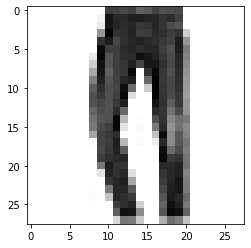

In [219]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Veamos la matriz de confusión de nuestro ejemplo:

In [245]:
#import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

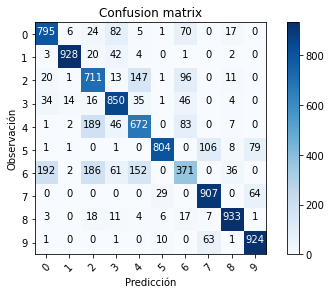

In [246]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predict the values from the validation dataset
Y_pred = network1.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

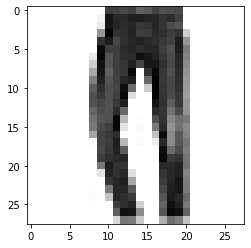

In [222]:
# Veamos el elemento 11 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [223]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print(test_labels)
# train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(test_labels)


[9 2 1 ... 8 1 5]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [224]:
predictions1 = network1.predict(test_images)
print(np.argmax(predictions1[5]))
print(predictions1[5])
np.sum(predictions1[5])
print(predictions1)

1
[2.2233836e-03 9.7202086e-01 5.0474852e-03 1.5007527e-02 5.1292363e-03
 5.2655218e-07 3.1660846e-04 2.4416286e-04 9.8877654e-06 3.0701338e-07]
[[2.02710347e-04 3.44136583e-06 4.07390326e-05 ... 2.85229236e-01
  1.64407343e-02 5.23753524e-01]
 [2.44264054e-04 3.68712499e-05 9.02861416e-01 ... 2.56997090e-09
  1.07069478e-04 1.38438133e-06]
 [1.39457452e-05 9.98734176e-01 1.97163914e-04 ... 9.39810707e-05
  1.03523455e-07 2.08622941e-09]
 ...
 [1.35220721e-01 3.68493516e-03 1.49981035e-02 ... 3.40276142e-03
  5.09971976e-01 5.38478512e-03]
 [2.80893000e-04 9.18180466e-01 3.39696975e-03 ... 9.06873320e-04
  1.09062976e-05 3.08964309e-06]
 [1.34300918e-03 1.32210017e-03 3.11802677e-03 ... 3.65871400e-01
  5.19763827e-02 6.02847449e-02]]


In [225]:
predictions2 = network2.predict(test_images)
print(np.argmax(predictions2[5]))
print(predictions2[5])
np.sum(predictions2[5])
print(predictions2)

1
[6.9436077e-03 9.7785109e-01 1.3533381e-03 1.3883766e-03 1.1436168e-02
 1.3585071e-09 1.0124804e-03 1.1089604e-06 4.7362396e-06 9.1253196e-06]
[[7.6310635e-06 7.2222174e-06 7.6358974e-06 ... 2.1334946e-01
  1.9396136e-02 6.4019644e-01]
 [2.8330350e-04 9.8311830e-07 7.9337567e-01 ... 2.4239692e-12
  3.6769782e-04 7.1853421e-17]
 [9.1883296e-05 9.9974459e-01 2.2951512e-05 ... 5.1664000e-07
  3.4209666e-08 8.4173880e-06]
 ...
 [4.4627663e-02 1.6347968e-06 3.4100346e-03 ... 1.2462365e-05
  6.8302625e-01 1.6516771e-05]
 [2.0951406e-05 9.9781954e-01 5.4160246e-05 ... 5.8980172e-06
  1.2824582e-07 1.2764447e-04]
 [1.7619987e-04 1.5921277e-04 1.2754105e-03 ... 1.0804364e-01
  2.8733628e-02 1.3541528e-02]]


In [226]:
predictions3 = network3.predict(test_images)
print(np.argmax(predictions3[5]))
print(predictions3[5])
np.sum(predictions3[5])
print(predictions3)

1
[0.13671996 0.41934597 0.05836019 0.17873946 0.05105098 0.05038951
 0.0465321  0.01681456 0.02199644 0.02005078]
[[0.02352246 0.02424524 0.03348882 ... 0.24095352 0.08257335 0.31621408]
 [0.05794292 0.02493304 0.25244975 ... 0.02606368 0.09427826 0.02448433]
 [0.07379882 0.5447715  0.03705769 ... 0.02028608 0.01821939 0.0190903 ]
 ...
 [0.18712032 0.08874936 0.08536011 ... 0.03022274 0.07329836 0.03840948]
 [0.07837667 0.44757837 0.03896677 ... 0.02101092 0.02059958 0.0222501 ]
 [0.02392519 0.02952419 0.04667825 ... 0.2886343  0.1349709  0.14723457]]


In [227]:
predictions4 = network4.predict(test_images)
print(np.argmax(predictions3[5]))
print(predictions4[5])
np.sum(predictions4[5])
print(predictions4)

1
[1.8298368e-03 9.6239638e-01 8.6966539e-03 1.4428314e-02 9.8932115e-03
 7.7092140e-05 2.2828940e-03 7.7023856e-07 3.5661188e-04 3.8271770e-05]
[[1.7352890e-03 1.2902092e-03 3.8659226e-03 ... 1.2829123e-01
  1.1567760e-02 6.0000050e-01]
 [7.2806929e-03 2.7525895e-03 8.0287296e-01 ... 3.1623789e-05
  5.2227946e-03 1.3827806e-04]
 [9.6741377e-04 9.7619969e-01 4.6916069e-03 ... 3.6003351e-07
  2.2662432e-04 3.1887957e-05]
 ...
 [9.4122924e-02 4.6888928e-04 4.0301057e-03 ... 1.6180076e-02
  7.1564174e-01 7.3200572e-05]
 [1.0179020e-03 9.7363764e-01 4.2644031e-03 ... 4.4585724e-07
  2.1590506e-04 3.9151117e-05]
 [6.6209311e-04 2.6588063e-04 5.5107591e-03 ... 7.5055204e-02
  3.0619176e-02 2.7946059e-02]]


In [228]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

TypeError: ignored

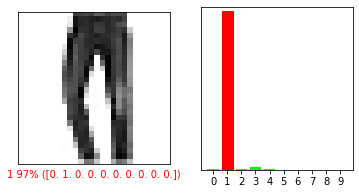

In [229]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions1[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions1[i],  test_labels)
plt.show()

TypeError: ignored

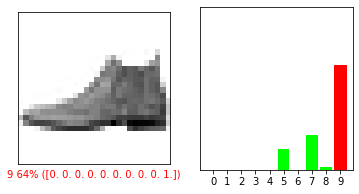

In [242]:
for i in range(9):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,i+1)
    plot_image(i, predictions2[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,i+2)
    plot_value_array(i, predictions2[i],  test_labels)
    plt.show()


TypeError: ignored

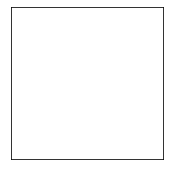

In [233]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions3[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions3[i],  test_labels)
plt.show()

TypeError: ignored

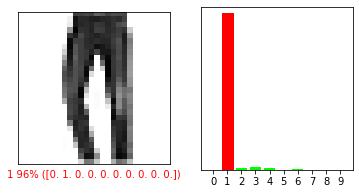

In [232]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions4[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions4[i],  test_labels)
plt.show()